Importar bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

 Cargar y explorar los datos

In [2]:
file_path = 'C:/xampp_php5/htdocs/php5/py/r/entregable02/inmuebles_bogota.csv'
data = pd.read_csv(file_path)
data.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


Preprocesamiento de los datos
# 1. Convertir 'Valor' a valores numéricos

In [6]:
data['Valor'] = data['Valor'].replace({'\$': '', '\.': ''}, regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Jhack Alberth\AppData\Local\Temp\ipykernel_27848\3417932777.py:1: SyntaxWarning: invalid escape sequence '\$'
  data['Valor'] = data['Valor'].replace({'\$': '', '\.': ''}, regex=True).astype(float)
C:\Users\Jhack Alberth\AppData\Local\Temp\ipykernel_27848\3417932777.py:1: SyntaxWarning: invalid escape sequence '\.'
  data['Valor'] = data['Valor'].replace({'\$': '', '\.': ''}, regex=True).astype(float)


In [7]:
data['Valor'].head()

0    3.600000e+08
1    6.700000e+08
2    1.120000e+09
3    8.900000e+08
4    9.700000e+08
Name: Valor, dtype: float64

In [8]:
# Configurar Pandas para mostrar números completos sin notación científica
pd.options.display.float_format = '{:.0f}'.format

# Revisar los datos para ver el cambio
print(data['Valor'].head())

0    360000000
1    670000000
2   1120000000
3    890000000
4    970000000
Name: Valor, dtype: float64


In [9]:
data.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360000000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,670000000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1120000000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,890000000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970000000


In [10]:
from sklearn.preprocessing import StandardScaler

# Selección de columnas relevantes (sin 'Descripcion' ya que es texto irrelevante para el modelo)
data = data[['Tipo', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ', 'Valor']]

# Codificación de variables categóricas
# Convertimos las columnas 'Tipo', 'Barrio' y 'UPZ' usando One-Hot Encoding
data = pd.get_dummies(data, columns=['Tipo', 'Barrio', 'UPZ'], drop_first=True)

# Separación de variables independientes (X) y dependiente (y)
X = data.drop('Valor', axis=1)  # Características para entrenamiento
y = data['Valor']  # Variable objetivo

# Estandarización de los datos de características (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalizamos las características

# Convertir X_scaled a un DataFrame para facilitar el uso
X = pd.DataFrame(X_scaled, columns=X.columns)

# Verificamos las primeras filas para confirmar
print(X.head())
print(y.head())

   Habitaciones  Baños  Área  Tipo_Bodega  Tipo_Casa  Tipo_Edificio  \
0            -0     -0    -0           -0         -1             -0   
1             0      0     0           -0          2             -0   
2            -0      0    -0           -0         -1             -0   
3            -0     -0     0           -0         -1             -0   
4            -1      0    -0           -0         -1             -0   

   Tipo_Finca  Tipo_Local  Tipo_Lote  Tipo_Oficina/Consultorio  ...  \
0          -0          -0         -0                        -0  ...   
1          -0          -0         -0                        -0  ...   
2          -0          -0         -0                        -0  ...   
3          -0          -0         -0                        -0  ...   
4          -0          -0         -0                        -0  ...   

   UPZ_Teusaquillo  UPZ_Timiza  UPZ_Tintala  UPZ_Tunjuelito  \
0               -0          -0           -0              -0   
1               -0  

In [11]:
data.head()

,Habitaciones,Baños,Área,Valor,Tipo_Bodega,Tipo_Casa,Tipo_Edificio,Tipo_Finca,Tipo_Local,Tipo_Lote,...,UPZ_Teusaquillo,UPZ_Timiza,UPZ_Tintala,UPZ_Tunjuelito,UPZ_USAQUÉN: Country Club + Santa Bárbara,UPZ_USME: Alfonso López + Ciudad Usme,UPZ_Usaquén,UPZ_Venecia,UPZ_Verbenal,UPZ_Zona Franca
0,3,2,70,360000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,3,170,670000000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3,144,1120000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2,154,890000000,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2,3,128,970000000,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [12]:
# Revisar la media y desviación estándar de las columnas en X
print("Media:\n", X.mean())
print("Desviación estándar:\n", X.std())

Media:
 Habitaciones                            -0
Baños                                   -0
Área                                     0
Tipo_Bodega                             -0
Tipo_Casa                                0
                                        ..
UPZ_USME: Alfonso López + Ciudad Usme    0
UPZ_Usaquén                             -0
UPZ_Venecia                             -0
UPZ_Verbenal                            -0
UPZ_Zona Franca                          0
Length: 220, dtype: float64
Desviación estándar:
 Habitaciones                            1 
Baños                                   1 
Área                                    1 
Tipo_Bodega                             1 
Tipo_Casa                               1 
                                        ..
UPZ_USME: Alfonso López + Ciudad Usme   1 
UPZ_Usaquén                             1 
UPZ_Venecia                             1 
UPZ_Verbenal                            1 
UPZ_Zona Franca                        

In [13]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Una sola salida para predicción de precio
])

c:\Users\Jhack Alberth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [17]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 854930626296414208.0000 - mean_absolute_error: 602637696.0000 - val_loss: 794829190418399232.0000 - val_mean_absolute_error: 594238400.0000
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 884885377486159872.0000 - mean_absolute_error: 601831680.0000 - val_loss: 794538025995468800.0000 - val_mean_absolute_error: 594049152.0000
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 852965111822811136.0000 - mean_absolute_error: 602352896.0000 - val_loss: 793010529466580992.0000 - val_mean_absolute_error: 593066240.0000
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 823407215611215872.0000 - mean_absolute_error: 597599360.0000 - val_loss: 788668420609540096.0000 - val_mean_absolute_error: 590273536.0000
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 840908760665817088.0000 - mean_absolute_error: 601178560.0000 - val_loss: 779744578080079872.0000 - val_mean_absolute_error: 58

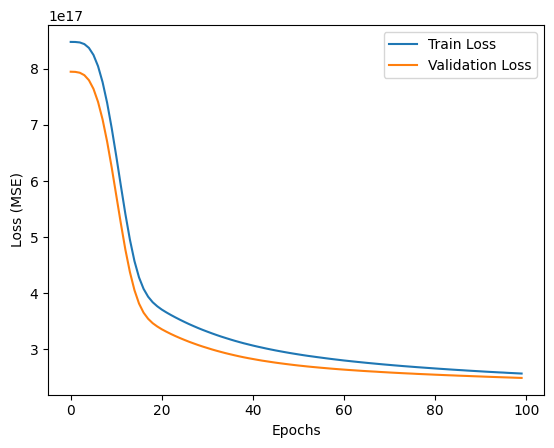

In [18]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [19]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) en el conjunto de prueba: {mae}')

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
Mean Absolute Error (MAE) en el conjunto de prueba: 274539484.53745407


In [21]:
# Ejemplo de datos de una nueva vivienda
nueva_vivienda = {
    'Habitaciones': 3,
    'Baños': 2,
    'Área': 80,
    'Tipo_Apartamento': 1,
    'Tipo_Casa': 0,
    # ... otras columnas relevantes según el modelo entrenado
}

# Crear DataFrame y agregar columnas faltantes en una sola operación
nueva_vivienda_df = pd.DataFrame([nueva_vivienda])

# Asegúrate de que todas las columnas coincidan con el conjunto de entrenamiento
nueva_vivienda_df = pd.concat([nueva_vivienda_df], axis=0)
nueva_vivienda_df = nueva_vivienda_df.reindex(columns=X.columns, fill_value=0)

# Normalizar los datos de la nueva vivienda con el scaler ajustado
nueva_vivienda_scaled = scaler.transform(nueva_vivienda_df)

# Realizar la predicción
precio_predicho = model.predict(nueva_vivienda_scaled)

# Mostrar el precio predicho
print(f'El precio predicho de la vivienda es: {precio_predicho[0][0]:,.0f} pesos')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
El precio predicho de la vivienda es: 440,545,760 pesos
